# Día de las comunidades Monterrey | Machine Learning para Videojuegos

##  ~~Israel Ortiz~~ Israel Zúñiga de la Mora | Monterrey Data Science & Engineering
### Update: Mie. 27/Sep  @ El Cowork  ~ 7PM / Panel de Data Science para Ciencias Sociales
## 23/Sep/2017 @ Coworking Monterrey

![RL](./images/rl_atari.png)

## Disclaimers:

###     1. Mi computadora puede apagarse en cualquier momento al ejecutar los demos  👼😇😅
###     2. Estudio esto en mis tiempos libres de forma autodidacta. Por curiosidad, y por que me apasiona 👾🐎
###     3. Aunque relacionado, hoy hablaremos lo mínimo posible de Deep Learning/Redes Neuronales  🍕

## Background check (al menos 1 de 3):

### - Asumimos familiaridad con:
#### - Python
#### - Machine Learning
#### - Tensorflow/PyTorch/MXNet/CNTK/Theano, Keras
### - Experiencia con modelos de entrenamiento supervisado 
### - Interés en ML para videojuegos y toma de decisiones; o self-driving cars, skynet, etc.

# Q-Learning / Funciones de valor
# FrozenLake - https://gym.openai.com/envs/FrozenLake-v0/

>The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.





En su implementación más sencilla, Q-Learning se asemeja a una tabla de valores para cada estado (renglón) y acción (columna) posible en el ambiente. Dentro de elemento de la matriz/celda de la tabla, se aprende un valor equivalente a que tan buena fue una acción correspondiente a cierto estado. En el caso de frozenlake, tenemos 16 estados posibles (uno por cada bloque), y cuatro posibles acciones (cuatro direcciones de movimiento), lo que nos otorga una tabla de 16x4 Q-Values. Inicializamos la tabla de manera uniforme (toda la matriz en en 0), después observamos las recompensas que obtenemos para distintas acciones; y actualizamos de manera acorde.


`
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
`


# $$ Q(s,a) = r + \gamma (max(Q(s’,a’))$$


Actualizamos nuestra tabla Q (Q-table) usando la Ecuación de Optimalidad de Bellman, que define la recompensa a largo plazo para una acción dada es igual a la recompensa inmediata de la acción actual en combinación de la recompensa esperada para la mejor acción a futuro, dado el siguiente estado:

# Algoritmo de Q-Learning 



**Inicializar** Q arbitrariamente

**Repetir**

⎯**Observar** s

⎯**Repetir** (n veces):

⎯**Seleccionar a** para **s** mediante la política 𝞊-greedy

⎯**Realizar** acción **a**

⎯**Observar r, s'**

⎯$Q(s, a) = Q(s, a) + \alpha [r + \gamma max Q(s', a') - Q(s, a)]$

⎯s = s'

⎯**Terminar** cuando s es terminal



Donde $\alpha\in(0,1]$ es un valor que se denomina ritmo de aprendizaje, y $ 𝛂 \in [0,1] $es el factor de descuento que indica cuán importante es la recompensa futura con respecto a la recompensa inmedianta $𝛄 =  0$; generalmente su valor es 1.

### Q-Table Learning en Python y OpenAI
#### Importamos como dependencias NumPy y Gym de OpenAI

![RL](./images/openai.svg)

```python
import gym
import numpy as np
```
#### Cargamos el ambiente de juego:
```python
# https://gym.openai.com/envs/FrozenLake-v0/
env = gym.make('FrozenLake-v0')
```





#### Todos los valores de la  matriz en 0
```python
# s, env.observation_space.n = 16  
# a, env.action_space.n = 4
# Q(s,a) = Q[s,a]
Q = np.zeros([env.observation_space.n, env.action_space.n])

```
#### Establecemos los parámetros de aprendizaje en especifico a este escenario
- Learning rate: Determina cuanto aprende el modelo en cada iteración
- Gamma: AKA `decay` o factor de descuento; para calcular la compensación de la recompensa a futuro
- Episodios: El número de juegos que queremos jugar para nuestro agent

```python
# Learning rate
lr = .8
# Gamma
y = .95
# Episodios: 2,000
num_episodes = 2000
```
#### Creamos una lista vacia que contiene el total de recompensas y pasos por episodio
```python
rList = []
```

```python
for i in range(num_episodes):
    # Reiniciamos el ambiente por cada número nuevo de iteración
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #Q-Table learning algorithm
    while j < 99:
        j+=1
        # Se elige una acción escogiendo al azar (con ruido) de la tabla-q
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        # Obtenemos un estado desde el ambiente  << Usando asignación multiple desde Python
        s1,r,d,_ = env.step(a)
        # Actualizamos la tabla-Q con nuevo conocimiento
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    rList.append(rAll)
```

In [2]:
import numpy

numpy.argmax?

# El Aprendizaje Automático tradicional es el reconocimiento de patrones en forma supervisada



![Cat](./images/cat.jpg)

# ➡️ "Gato"    😱😱😱😱😱😱😱😱😱😱🔥😍🐱😹

## [How HBO’s Silicon Valley built “Not Hotdog” with mobile TensorFlow, Keras & React Native](https://medium.com/@timanglade/how-hbos-silicon-valley-built-not-hotdog-with-mobile-tensorflow-keras-react-native-ef03260747f3)

# En RL, queremos agentes que actuen de forma propia, y no solo reconozcan patrones



![](./images/2_cam.jpg)

![](./images/762522.gif)

![](./images/balancin.gif)

# Markov Decision Processes (MDPs) / Procesos de decisión Markov para problemas de toma de decisiones secuenciales


![](./images/agente_ambiente.svg)


* Agente ➡️ El algoritmo haciendo la actuación
* Ambiente ➡️ Donde el agente interactua
* Estados $s$ ➡️ El estado inmediato del ambiente
* Acciones $a$ ➡️ Que puede hacer el agente dentro del ambiente
* Transiciones $P(s'|s,a)$➡️ Como las acciones cambian el estado
* Recompensas $R(r|s,a)$ ➡️ Cuán positiva/negativa es una acción sobre un estado
* Politica $\pi$➡️ Como el agente elige sus acciones

# Reinforcement Learning

![Progeny: https://xkcd.com/894/ ](https://imgs.xkcd.com/comics/progeny.png)

# ¿Como lograr el objetivo de *aprender una política mediante reforzadores*?

## 1. Búsqueda en el espacio de políticas
## 2. Asignación de crédito temporal
## 3. Funciones de valor y Diferencias Temporales   (Q-Learning / Q-Learning Tables)

# RL en videojuegos:

* Agente(s) ➡️ Tablero/Plataforma, jugador(es)
* Ambiente ➡️ Conjunto de todas las posibles configuraciones del juego (escenarios, campañas)
* Estados $s$ ➡️ Scores
* Acciones $a$ ➡️ WASD
* Transiciones $P(s'|s,a)$➡️ 🙈😆
* Recompensas $R(r|s,a)$ ➡️ Ganar/perder el juego o el turno,  penalizaciones...
* Politica $\pi$➡️ Estrategía optima (para recursos, bloqueo a otros jugadores, tiempos de juego)

# Cuatro problemas con los que el RL debe lidiar:

1. Balance entre Exploración/Explotación
2. Recompensas con retraso (Temporal Difference Learning / Long short-term memory Neural Networtks [LSTM])
3. Ambientes dinámicos
4. Generalización

# Deep Reinforcement Learning / Deep Q-Learning  (DQN)


![](./images/paper-dqn.png)

# OpenAI's Baseline

Las mejores práctias del DQN en versión plug&play: Random vs DQN

![](./images/image2-1.gif)

# AlphaGo

![](./images/alphago.jpg)

# AlphaGo

![](./images/aphago_slide.jpg)

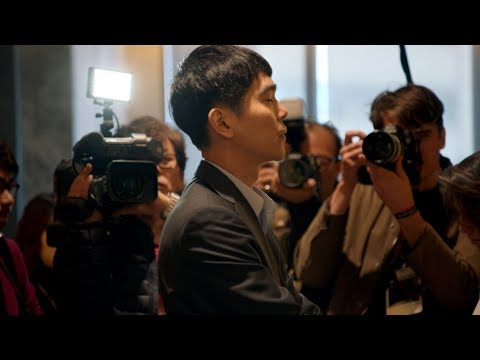

In [13]:
YouTubeVideo('8tq1C8spV_g')

# ¿Qué necesita un agente de IA para usar videojuegos?

Uso de acciones y planeación jerárquica:

* Uso efectivo de la memoria (hardware)
* Habilidad de planear sobre un tiempo prolongado
* Capacidad de adaptar la estrategia después de obtener nueva información
* Ejecución de acciones simples como “expande tu base a cierta ubicación“, coordinación de puntos usando el mouse u otros recursos de entrada disponibles


# ¿Qué Ambientes de RL para videjuegos tenemos disponibles?

* Atari
* OpenAI
* Doom II
* Grand Theft Auto  V
* DOTA II (restringido a investigadores de OpenAI)
* StarCraft II


# DeepMind's StarCraft AI Environment (Python3 + pysc2)

## Instalación / Hello world


### 1. Instalar StarCraft II  (http://us.battle.net/sc2/en/legacy-of-the-void/)
### 2. Instalar pysc2 y los escenarios

1. Instalar pysc2
2. Clonar el repo https://github.com/chris-chris/pysc2-examples
3. Descargar *replays*, y mapas de *mini-games* para  StarCraft II
    * https://github.com/deepmind/pysc2/releases/download/v1.0/mini_games.zip
    * just error in CollectMineralShards #53: https://github.com/deepmind/pysc2/issues/53#issuecomment-326829857
    * http://blzdistsc2-a.akamaihd.net/ReplayPacks/3.16.1-Pack_1-fix.zip
4. Instalar Tensorflow, y baseline de OpenAI
5. Ejecutar el script de entrenamiento, o el modelo pre-entrenado (`enjoy_mineral_shards.py`)


In [1]:
! pip install pysc2

In [2]:
! pip install baselines

  Using cached baselines-0.1.4-py3-none-any.whl
  Using cached zmq-0.0.0.tar.gz
    100% |████████████████████████████████| 51kB 1.5MB/s ta 0:00:011
  Using cached joblib-0.11-py2.py3-none-any.whl
  Could not find a version that satisfies the requirement tensorflow>=1.0.0 (from baselines) (from versions: )
No matching distribution found for tensorflow>=1.0.0 (from baselines)


In [3]:
! conda install tensorflow

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/israel/anaconda3/envs/ai_rl:
#
tensorflow                1.1.0               np112py35_0  


# Fin / Gracias! 😘